In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
station = pd.read_csv('stations.csv')
year2001 = pd.read_csv('./csvs_per_year/madrid_2001.csv')
year2001 = year2001.dropna()
year2002 = pd.read_csv('./csvs_per_year/madrid_2002.csv')
year2002 = year2002.dropna()
year2003 = pd.read_csv('./csvs_per_year/madrid_2003.csv')
year2003 = year2003.dropna()
year2004 = pd.read_csv('./csvs_per_year/madrid_2004.csv')
year2004 = year2004.dropna()
year2005 = pd.read_csv('./csvs_per_year/madrid_2005.csv')
year2005 = year2005.dropna()
year2006 = pd.read_csv('./csvs_per_year/madrid_2006.csv')
year2006 = year2006.dropna()
year2007 = pd.read_csv('./csvs_per_year/madrid_2007.csv')
year2007 = year2007.dropna()
year2008 = pd.read_csv('./csvs_per_year/madrid_2008.csv')
year2008 = year2008.dropna()
year2009 = pd.read_csv('./csvs_per_year/madrid_2009.csv')
year2009 = year2009.dropna()
year2010 = pd.read_csv('./csvs_per_year/madrid_2010.csv')
year2010 = year2010.dropna()
year2011 = pd.read_csv('./csvs_per_year/madrid_2011.csv')
year2011 = year2011.dropna()
year2012 = pd.read_csv('./csvs_per_year/madrid_2012.csv')
year2012 = year2012.dropna()
year2013 = pd.read_csv('./csvs_per_year/madrid_2013.csv')
year2013 = year2013.dropna()
year2014 = pd.read_csv('./csvs_per_year/madrid_2014.csv')
year2014 = year2014.dropna()
year2015 = pd.read_csv('./csvs_per_year/madrid_2015.csv')
year2015 = year2015.dropna()
year2016 = pd.read_csv('./csvs_per_year/madrid_2016.csv')
year2016 = year2016.dropna()
year2017 = pd.read_csv('./csvs_per_year/madrid_2017.csv')
year2017 = year2017.dropna()
year2018 = pd.read_csv('./csvs_per_year/madrid_2018.csv')
year2018 = year2018.dropna()

In [3]:
feature = ['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL','date','station']
year2001f = year2001[feature].copy()
year2002f = year2002[feature].copy()
year2003f = year2003[feature].copy()
year2004f = year2004[feature].copy()
year2005f = year2005[feature].copy()
year2006f = year2006[feature].copy()
year2007f = year2007[feature].copy()
year2008f = year2008[feature].copy()
year2009f = year2009[feature].copy()
year2010f = year2010[feature].copy()
year2011f = year2011[feature].copy()
year2012f = year2012[feature].copy()
year2013f = year2013[feature].copy()
year2014f = year2014[feature].copy()
year2015f = year2015[feature].copy()
year2016f = year2016[feature].copy()
year2017f = year2017[feature].copy()
year2018f = year2018[feature].copy()

In [4]:
year2001.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
1,2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035
5,2001-08-01 01:00:00,2.11,0.63,2.48,5.94,0.05,66.260002,118.099998,3.15,33.500000,122.699997,2.29,6.36,1.23,13.28,28079006
21,2001-08-01 01:00:00,0.80,0.43,0.71,1.20,0.10,27.190001,29.700001,0.76,56.990002,114.300003,0.49,10.84,1.42,3.43,28079024
23,2001-08-01 01:00:00,1.29,0.34,1.41,3.09,0.07,40.750000,51.570000,1.70,51.580002,102.199997,1.28,7.97,1.30,7.83,28079099
25,2001-08-01 02:00:00,0.87,0.06,0.88,2.41,0.01,29.709999,31.440001,1.20,56.520000,56.290001,1.02,6.90,1.17,6.49,28079035


### Algorithm of AQI

In [5]:
def add_AQI(x):
    for i in x.index:
        AQL_CO, AQL_SO2, AQL_NO2, AQL_O3 = 0,0,0,0
        if x.loc[i,'CO'] < 5:
            AQL_CO = (x.loc[i,'CO'] - 0) * 10 + 0
        elif x.loc[i,'CO'] < 10:
            AQL_CO = (x.loc[i,'CO'] - 5) * 10 + 50
        elif x.loc[i,'CO'] < 35:
            AQL_CO = (x.loc[i,'CO'] - 10) * 2 + 100
        elif x.loc[i,'CO'] < 60:
            AQL_CO = (x.loc[i,'CO'] - 35) * 2 + 150
        elif x.loc[i,'CO'] < 90:
            AQL_CO = (x.loc[i,'CO'] - 60) * 10 / 3 + 200
        elif x.loc[i,'CO'] < 120:
            AQL_CO = (x.loc[i,'CO'] - 90) * 10 / 3 + 300
        else:
            AQL_CO = (x.loc[i,'CO'] - 120) * 10 / 3 + 400
        
        if x.loc[i,'NO_2'] < 100:
            AQL_NO2 = (x.loc[i,'NO_2'] - 0) * 1 / 2 + 0
        elif x.loc[i,'NO_2'] < 200:
            AQL_NO2 = (x.loc[i,'NO_2'] - 100) * 1 / 2 + 50
        elif x.loc[i,'NO_2'] < 700:
            AQL_NO2 = (x.loc[i,'NO_2'] - 200) * 1 / 10 + 100
        elif x.loc[i,'NO_2'] < 1200:
            AQL_NO2 = (x.loc[i,'NO_2'] - 700) * 1 / 10 + 150
        elif x.loc[i,'NO_2'] < 2340:
            AQL_NO2 = (x.loc[i,'NO_2'] - 1200) * 5 / 57 + 200
        elif x.loc[i,'NO_2'] < 3090:
            AQL_NO2 = (x.loc[i,'NO_2'] - 2340) * 2 / 15 + 300
        else:
            AQL_NO2 = (x.loc[i,'NO_2'] - 3090) * 2 / 15 + 400
        
        if x.loc[i,'SO_2'] < 150:
            AQL_SO2 = (x.loc[i,'SO_2'] - 0) * 1 / 3 + 0
        elif x.loc[i,'SO_2'] < 500:
            AQL_SO2 = (x.loc[i,'SO_2'] - 150) * 1 / 7 + 50
        elif x.loc[i,'SO_2'] < 650:
            AQL_SO2 = (x.loc[i,'SO_2'] - 500) * 1 / 3 + 100
        elif x.loc[i,'SO_2'] < 800:
            AQL_SO2 = (x.loc[i,'SO_2'] - 650) * 1 / 3 + 150
        elif x.loc[i,'SO_2'] < 1600:
            AQL_SO2 = (x.loc[i,'SO_2'] - 800) * 1 / 8 + 200
        elif x.loc[i,'SO_2'] < 2100:
            AQL_SO2 = (x.loc[i,'SO_2'] - 1600) * 1 / 5 + 300
        else:
            AQL_SO2 = (x.loc[i,'SO_2'] - 2100) * 5 / 26 + 400
        
        if x.loc[i,'O_3'] < 160:
            AQL_O3 = (x.loc[i,'O_3'] - 0) * 5 / 16 + 0
        elif x.loc[i,'O_3'] < 200:
            AQL_O3 = (x.loc[i,'O_3'] - 160) * 5 / 4 + 50
        elif x.loc[i,'O_3'] < 300:
            AQL_O3 = (x.loc[i,'O_3'] - 200) * 1 / 2 + 100
        elif x.loc[i,'O_3'] < 400:
            AQL_O3 = (x.loc[i,'O_3'] - 300) * 1 / 2 + 150
        elif x.loc[i,'O_3'] < 800:
            AQL_O3 = (x.loc[i,'O_3'] - 400) * 1 / 4 + 200
        elif x.loc[i,'O_3'] < 1000:
            AQL_O3 = (x.loc[i,'O_3'] - 800) * 1 / 2 + 300
        else:
            AQL_O3 = (x.loc[i,'O_3'] - 1000) * 1 / 2 + 400    
        x.loc[i,'AQI'] = max([AQL_CO, AQL_SO2, AQL_NO2, AQL_O3])
    return np.mean(x['AQI'])

In [6]:
AQI_2001 = add_AQI(year2001f)
AQI_2002 = add_AQI(year2002f)
AQI_2003 = add_AQI(year2003f)
AQI_2004 = add_AQI(year2004f)
AQI_2005 = add_AQI(year2005f)
AQI_2006 = add_AQI(year2006f)
AQI_2007 = add_AQI(year2007f)
AQI_2008 = add_AQI(year2008f)
AQI_2009 = add_AQI(year2009f)
AQI_2010 = add_AQI(year2010f)
AQI_2011 = add_AQI(year2011f)
AQI_2012 = add_AQI(year2012f)
AQI_2013 = add_AQI(year2013f)
AQI_2014 = add_AQI(year2014f)
AQI_2015 = add_AQI(year2015f)
AQI_2016 = add_AQI(year2016f)
AQI_2017 = add_AQI(year2017f)
AQI_2018 = add_AQI(year2018f)

In [7]:
AQI_2001

35.05730079561956

In [8]:
AQI_2007

32.15659361703355

### Linear Regression (Sklearn)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
def Learning(X):
    features=['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL']
    data_x=X[features].values
    data_x=np.mat(data_x)
    data_labels=X['AQI'].values
    data_y=np.mat(data_labels).T
    reg = LinearRegression().fit(data_x, data_y)
    RMSE=np.sqrt(((reg.predict(data_x)-data_y).T * (reg.predict(data_x)-data_y))/len(data_y))
    average=np.mean(reg.predict(data_x))
    return [reg.coef_,reg.intercept_[0],RMSE,average]

In [11]:
RMSE=np.mat(np.zeros(18))
MEAN=np.mat(np.zeros(18))
Theta=np.mat(np.zeros(180)).reshape(18,10)
Intercept=np.mat(np.zeros(18))

In [12]:
Year=[year2001f,year2002f,year2003f,year2004f,year2005f,year2006f,year2007f,year2008f,year2009f,
      year2010f,year2011f,year2012f,year2013f,year2014f,year2015f,year2016f,year2017f,year2018f]

In [13]:
for i in range(18):
    [Theta[i,:],Intercept[0,i],RMSE[0,i],MEAN[0,i]]=Learning(Year[i])

In [14]:
AQI=[AQI_2001,AQI_2002,AQI_2003,AQI_2004,AQI_2005,AQI_2006,AQI_2007,AQI_2008,AQI_2009,
     AQI_2010,AQI_2011,AQI_2012,AQI_2013,AQI_2014,AQI_2015,AQI_2016,AQI_2017,AQI_2018,]

Text(0,0.5,'AQI')

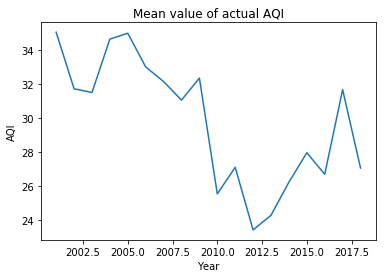

In [15]:
x=np.linspace(2001,2018,18)
plt.plot(x,AQI)
plt.title('Mean value of actual AQI')
plt.xlabel('Year')
plt.ylabel('AQI')

Text(0,0.5,'AQI')

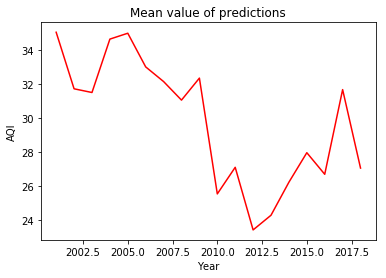

In [16]:
plt.plot(x,np.array(MEAN[0,:].T),color='r')
plt.title('Mean value of predictions')
plt.xlabel('Year')
plt.ylabel('AQI')

Text(0,0.5,'RMSE')

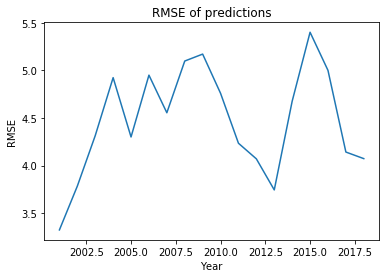

In [17]:
plt.plot(x,np.array(RMSE[0,:].T))
plt.title('RMSE of predictions')
plt.xlabel('Year')
plt.ylabel('RMSE')

### Result of 2005

In [18]:
features=['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL']
data_x=year2005f[features].values
data_x=np.mat(data_x)
data_labels=year2005f['AQI'].values
data_y=np.mat(data_labels).T

In [19]:
reg = LinearRegression().fit(data_x, data_y)
print('theta_1--theta_n:',reg.coef_)
print('theta_0:',reg.intercept_[0])
print('RMSE', np.sqrt(((reg.predict(data_x)-data_y).T * (reg.predict(data_x)-data_y))/len(data_y)))

theta_1--theta_n: [[-4.46538621e-01  3.40906486e+00  4.83004704e-01 -4.44654955e+00
   4.09073272e-01  1.07706072e-01  6.74563672e-03  5.24405459e-02
   2.28283064e+00  2.40335576e-03]]
theta_0: -1.7011362429351138
RMSE [[4.299995]]


Text(0,0.5,'AQI')

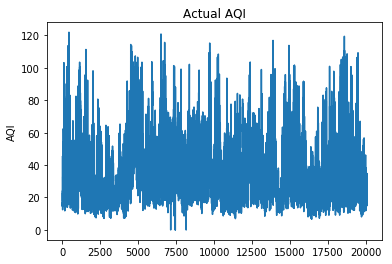

In [20]:
plt.plot(range(len(data_y)),data_y)
plt.title('Actual AQI')
plt.ylabel('AQI')

Text(0,0.5,'AQI')

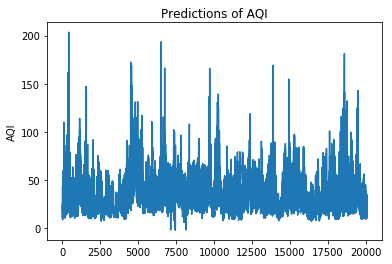

In [21]:
plt.plot(range(len(data_y)),reg.predict(data_x))
plt.title('Predictions of AQI')
plt.ylabel('AQI')

In [22]:
features_=['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL','AQI']
data_features=year2005f[features_]
data_features.corr()

,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,AQI
BEN,1.000000,0.851071,0.909510,0.736615,0.670168,-0.441308,0.612771,0.673902,0.714584,0.911775,0.681167
CO,0.851071,1.000000,0.750310,0.855207,0.737328,-0.466881,0.666693,0.711713,0.802383,0.773982,0.752842
EBE,0.909510,0.750310,1.000000,0.689797,0.616246,-0.406820,0.583449,0.590441,0.684868,0.918412,0.633695
NMHC,0.736615,0.855207,0.689797,1.000000,0.617731,-0.433811,0.633619,0.585660,0.819249,0.738275,0.622915
NO_2,0.670168,0.737328,0.616246,0.617731,1.000000,-0.558018,0.567845,0.637036,0.626352,0.645927,0.959545
O_3,-0.441308,-0.466881,-0.406820,-0.433811,-0.558018,1.000000,-0.298178,-0.428962,-0.467021,-0.452218,-0.443409
PM10,0.612771,0.666693,0.583449,0.633619,0.567845,-0.298178,1.000000,0.465233,0.671983,0.637401,0.585569
SO_2,0.673902,0.711713,0.590441,0.585660,0.637036,-0.428962,0.465233,1.000000,0.597968,0.570559,0.642988
TCH,0.714584,0.802383,0.684868,0.819249,0.626352,-0.467021,0.671983,0.597968,1.000000,0.742437,0.634092
TOL,0.911775,0.773982,0.918412,0.738275,0.645927,-0.452218,0.637401,0.570559,0.742437,1.000000,0.651844


### Linear Regression (Model)

In [23]:
theta = np.mat(np.zeros(data_x.shape[1])).T
theta.shape
theta.dtype
alpha = 0.00000001

In [37]:
def Cost(X,y,theta):
    m = y.shape[0]
    err = X*theta-y
    J = err.T * err / (2 * m)
    return J[0,0]

In [38]:
def Gradient(X,y,theta):
    m = y.shape[0]
    err = X*theta-y
    grad = 1 / m * err.T * X
    return grad

In [39]:
def Theta_update(alpha,X,y,theta):
    grad = Gradient(X,y,theta)
    theta = theta - alpha * grad.T
    grad_2norm2 = (grad * grad.T)[0,0]
    return [theta,grad_2norm2]

In [40]:
def GradDesc(X, y, alpha, theta = np.mat(np.zeros(np.shape(data_x)[1])).T, iterations = 70000):
    cost_list=[Cost(X,y,theta)]
    i=0
    for i in range(iterations):
        [new_theta,grad_2norm2] = Theta_update(alpha,X,y,theta)
        new_cost = Cost(X,y,new_theta)
        theta = new_theta
        cost_list.append(new_cost)
        i += 1
    print('#Iteration:',i,'Cost:',new_cost)
    print('Square of 2-norm of grad:',grad_2norm2)
    return [theta,cost_list]

In [41]:
RMSE_1=np.mat(np.zeros(18))
MEAN_1=np.mat(np.zeros(18))
Theta_1=np.mat(np.zeros(180)).reshape(18,10)
Intercept_1=np.mat(np.zeros(18))

In [42]:
alpha = 0.00000001
[theta,cost_list] = GradDesc(data_x,data_y,alpha)

#Iteration: 70000 Cost: 13.60952224604738
Square of 2-norm of grad: 3359.995290096696


In [43]:
theta

matrix([[0.01062081],
        [0.00385297],
        [0.01268163],
        [0.00090787],
        [0.37065228],
        [0.10844556],
        [0.14710804],
        [0.06973411],
        [0.00624623],
        [0.04668413]])

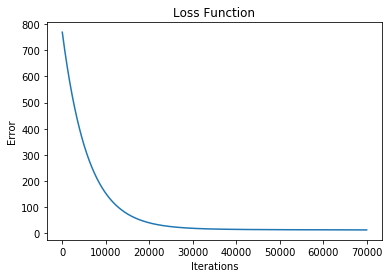

In [44]:
plt.plot(range(len(cost_list)),cost_list)
plt.title('Loss Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [45]:
predict_y=data_x@theta

In [46]:
print('RMSE', np.sqrt(((predict_y-data_y).T * (predict_y-data_y))/len(data_y)))

RMSE [[5.21718741]]


In [47]:
RMSE_1=np.mat(np.zeros(18))
MEAN_1=np.mat(np.zeros(18))
Theta_1=np.mat(np.zeros(180)).reshape(18,10)
Intercept_1=np.mat(np.zeros(18))

In [48]:
def Learning_1(X):
    features=['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL']
    data_x=X[features].values
    data_x=np.mat(data_x)
    data_labels=X['AQI'].values
    data_y=np.mat(data_labels).T
    [theta,cost_list] = GradDesc(data_x,data_y,alpha)
    predict_y=data_x@theta
    RMSE=np.sqrt(((predict_y-data_y).T * (predict_y-data_y))/len(data_y))
    average=np.mean(predict_y)
    return [reg.coef_,reg.intercept_[0],RMSE,average]

In [49]:
for i in range(18):
    [Theta_1[i,:],Intercept_1[0,i],RMSE_1[0,i],MEAN_1[0,i]]=Learning_1(Year[i])

#Iteration: 70000 Cost: 11.293187289103832
Square of 2-norm of grad: 4743.1018060544575
#Iteration: 70000 Cost: 12.415792215862014
Square of 2-norm of grad: 3190.033681443992
#Iteration: 70000 Cost: 14.467183723232472
Square of 2-norm of grad: 3421.1153425345233
#Iteration: 70000 Cost: 16.475789677289896
Square of 2-norm of grad: 2878.3635283465323
#Iteration: 70000 Cost: 13.60952224604738
Square of 2-norm of grad: 3359.995290096696
#Iteration: 70000 Cost: 17.082581082490396
Square of 2-norm of grad: 2632.588073977342
#Iteration: 70000 Cost: 13.302169045559767
Square of 2-norm of grad: 1550.0318220481054
#Iteration: 70000 Cost: 16.4584538800184
Square of 2-norm of grad: 2117.5518237963856
#Iteration: 70000 Cost: 15.770868918860248
Square of 2-norm of grad: 2136.905737878289
#Iteration: 70000 Cost: 18.91423231369274
Square of 2-norm of grad: 15380.065894893478
#Iteration: 70000 Cost: 14.290551008770203
Square of 2-norm of grad: 7272.418917998992
#Iteration: 70000 Cost: 19.6932968507738


Text(0,0.5,'RMSE')

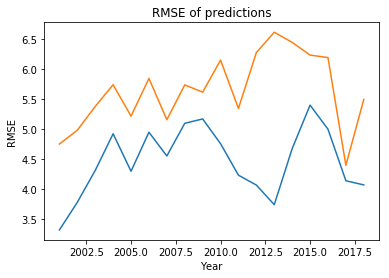

In [50]:
plt.plot(x,np.array(RMSE[0,:].T),x,np.array(RMSE_1[0,:].T))
plt.title('RMSE of predictions')
plt.xlabel('Year')
plt.ylabel('RMSE')

### Regularization

In [51]:
theta = np.mat(np.zeros(data_x.shape[1])).T
theta.shape
theta.dtype
alpha = 0.00000001
lambdas=0.2

In [52]:
def Cost_1(X,y,theta,lambdas):
    m = y.shape[0]
    err = X*theta-y
    J = err.T * err / (2 * m)+lambdas/(2*m)*(theta.T*theta)
    return J[0,0]

In [53]:
def Gradient_1(X,y,theta,lambdas):
    m = y.shape[0]
    err = X*theta-y
    grad = 1 / m * err.T * X+lambdas/m*theta.T 
    return grad

In [54]:
def Theta_update_1(alpha,X,y,theta,lambdas):
    grad = Gradient_1(X,y,theta,lambdas)
    theta = theta - alpha * grad.T
    grad_2norm2 = (grad * grad.T)[0,0]
    return [theta,grad_2norm2]

In [55]:
def GradDesc_1(X, y, alpha, lambdas ,theta = np.mat(np.zeros(np.shape(data_x)[1])).T, iterations = 70000):
    cost_list=[Cost_1(X,y,theta,lambdas)]
    i=0
    for i in range(iterations):
        [new_theta,grad_2norm2] = Theta_update_1(alpha,X,y,theta,lambdas)
        new_cost = Cost_1(X,y,new_theta,lambdas)
        theta = new_theta
        cost_list.append(new_cost)
        i += 1
    return [theta,cost_list]

In [56]:
alpha = 0.00000001
lambdas=0.2
[theta,cost_list] = GradDesc_1(data_x,data_y,alpha,lambdas)

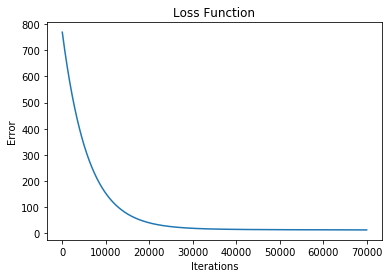

In [57]:
plt.plot(range(len(cost_list)),cost_list)
plt.title('Loss Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [58]:
predict_y=data_x@theta

In [59]:
print('RMSE', np.sqrt(((predict_y-data_y).T * (predict_y-data_y))/len(data_y)))

RMSE [[5.21718741]]


In [60]:
RMSE_2=np.mat(np.zeros(18))
MEAN_2=np.mat(np.zeros(18))
Theta_2=np.mat(np.zeros(180)).reshape(18,10)
Intercept_2=np.mat(np.zeros(18))

In [61]:
def Learning_2(X):
    features=['BEN','CO','EBE','NMHC','NO_2','O_3','PM10','SO_2','TCH','TOL']
    data_x=X[features].values
    data_x=np.mat(data_x)
    data_labels=X['AQI'].values
    data_y=np.mat(data_labels).T
    [theta,cost_list] = GradDesc_1(data_x,data_y,alpha,lambdas)
    predict_y=data_x@theta
    RMSE=np.sqrt(((predict_y-data_y).T * (predict_y-data_y))/len(data_y))
    average=np.mean(predict_y)
    return [reg.coef_,reg.intercept_[0],RMSE,average]

In [62]:
for i in range(18):
    [Theta_2[i,:],Intercept_2[0,i],RMSE_2[0,i],MEAN_2[0,i]]=Learning_2(Year[i])

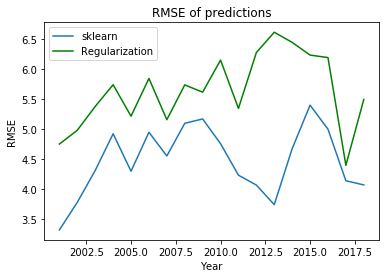

In [63]:
plt.plot(x,np.array(RMSE[0,:].T),label='sklearn')
#plt.plot(x,np.array(RMSE_1[0,:].T),label='Gradient Descent')
plt.plot(x,np.array(RMSE_2[0,:].T),label='Regularization',color='g')
plt.title('RMSE of predictions')
plt.legend()
plt.xlabel('Year')
plt.ylabel('RMSE')
plt.show()

### Station Casa de Campo(28079024)

In [64]:
data_24=[year2001f[year2001f['station']==28079024],year2002f[year2002f['station']==28079024],
      year2003f[year2003f['station']==28079024],year2004f[year2004f['station']==28079024],
      year2005f[year2005f['station']==28079024],year2006f[year2006f['station']==28079024],
      year2007f[year2007f['station']==28079024],year2008f[year2008f['station']==28079024],
      year2009f[year2009f['station']==28079024],year2010f[year2010f['station']==28079024],
      year2011f[year2011f['station']==28079024],year2012f[year2012f['station']==28079024],
      year2013f[year2013f['station']==28079024],year2014f[year2014f['station']==28079024],
      year2015f[year2015f['station']==28079024],year2016f[year2016f['station']==28079024],
      year2017f[year2017f['station']==28079024],year2018f[year2018f['station']==28079024]]
AQI_24=np.mat(np.zeros(18))
for i in range(18):
    AQI_24[0,i]=np.mean(data_24[i]['AQI'])

In [65]:
RMSE_24=np.mat(np.zeros(18))
MEAN_24=np.mat(np.zeros(18))
Theta_24=np.mat(np.zeros(180)).reshape(18,10)
Intercept_24=np.mat(np.zeros(18))
for i in range(18):
    [Theta_24[i,:],Intercept_24[0,i],RMSE_24[0,i],MEAN_24[0,i]]=Learning(data_24[i])

Text(0,0.5,'AQI')

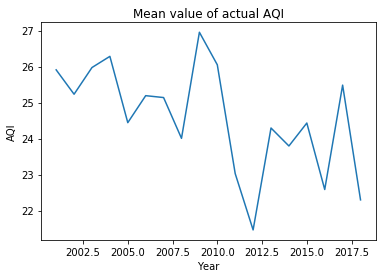

In [66]:
x=np.linspace(2001,2018,18)
plt.plot(x,AQI_24.T)
plt.title('Mean value of actual AQI')
plt.xlabel('Year')
plt.ylabel('AQI')

Text(0,0.5,'AQI')

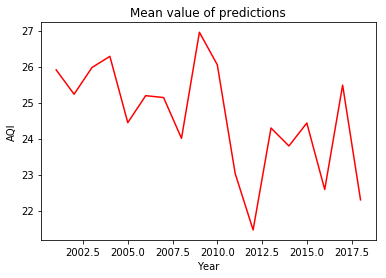

In [67]:
plt.plot(x,np.array(MEAN_24[0,:].T),color='r')
plt.title('Mean value of predictions')
plt.xlabel('Year')
plt.ylabel('AQI')

Text(0,0.5,'RMSE')

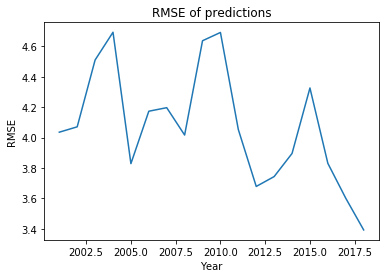

In [68]:
plt.plot(x,np.array(RMSE_24[0,:].T))
plt.title('RMSE of predictions')
plt.xlabel('Year')
plt.ylabel('RMSE')